              precision    recall  f1-score   support

     trusted      0.736     0.894     0.807      1250
   untrusted      0.865     0.678     0.761      1250

    accuracy                          0.786      2500
   macro avg      0.800     0.786     0.784      2500
weighted avg      0.800     0.786     0.784      2500



Text(0.5, 0, 'Feature Name')

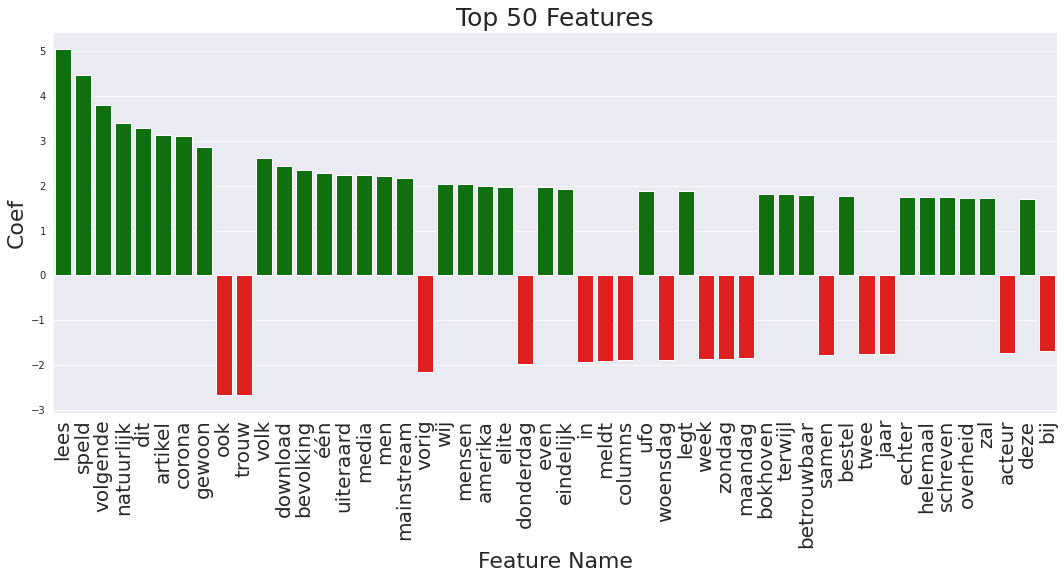

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

sns.set_style("darkgrid")
train = pd.read_csv("/content/drive/MyDrive/Master Thesis/train.csv")
dev = pd.read_csv("/content/drive/MyDrive/Master Thesis/dev.csv")
test = pd.read_csv("/content/drive/MyDrive/Master Thesis/test.csv")

text_clf = Pipeline([('vect', TfidfVectorizer()),
                     ('clf', LinearSVC())])

text_clf = text_clf.fit(train["article"], train["trust"])
pred = text_clf.predict(test["article"])
print(classification_report(test["trust"], pred, digits=3))

feature_names = text_clf.named_steps["vect"].get_feature_names()
coefs = text_clf.named_steps["clf"].coef_.flatten()

#Top features
zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(18, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(50),
           palette=df.head(50)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 50 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)